In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
positives_dir = 'D://project cps/DATA/positives'
negatives_dir = 'D://project cps/DATA/negatives'

# Create ImageDataGenerators
datagen_positives = ImageDataGenerator(rescale=1./255, validation_split=0.2)
datagen_negatives = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load positives data
train_positives = datagen_positives.flow_from_directory(
    positives_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_positives = datagen_positives.flow_from_directory(
    positives_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load negatives data
train_negatives = datagen_negatives.flow_from_directory(
    negatives_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_negatives = datagen_negatives.flow_from_directory(
    negatives_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2271 images belonging to 9 classes.
Found 563 images belonging to 9 classes.
Found 1946 images belonging to 9 classes.
Found 482 images belonging to 9 classes.


In [2]:
def create_model(num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Number of classes in smile detection
num_classes_smile = len(train_positives.class_indices)

model_smile = create_model(num_classes_smile)
model_smile.summary()

# Train the model
model_smile.fit(train_positives, validation_data=val_positives, epochs=10)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,943,433 (49.38 MB)

 Trainable params: 12,943,433 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 27s 344ms/step - accuracy: 0.7523 - loss: 0.7955 - val_accuracy: 1.0000 - val_loss: 1.1286e-04
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 1.0000 - loss: 7.1266e-04 - val_accuracy: 1.0000 - val_loss: 1.7700e-04
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 1.0000 - loss: 7.6808e-05 - val_accuracy: 1.0000 - val_loss: 6.1102e-06
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 1.0000 - loss: 1.5242e-05 - val_accuracy: 1.0000 - val_loss: 2.0437e-06
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 1.0000 - loss: 1.1619e-05 - val_accuracy: 1.0000 - val_loss: 9.7801e-07
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 1.0000 - loss: 5.3730e-06 - val_accuracy: 1.0000 - val_loss: 6.7777e-07
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 1.0000 - loss: 4.3840e-06 - val_accuracy: 1.0000 - val_loss: 5.1728e-07
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accur

In [3]:
# Number of classes in non-smile detection
num_classes_non_smile = len(train_negatives.class_indices)

model_non_smile = create_model(num_classes_non_smile)
model_non_smile.summary()

# Train the model
model_non_smile.fit(train_negatives, validation_data=val_negatives, epochs=10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,943,433 (49.38 MB)

 Trainable params: 12,943,433 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.6403 - loss: 1.2315 - val_accuracy: 1.0000 - val_loss: 2.8254e-05
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 1.0280e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 1.0000 - loss: 1.4841e-04 - val_accuracy: 1.0000 - val_loss: 3.2437e-05
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 1.0000 - loss: 1.8241e-05 - val_accuracy: 1.0000 - val_loss: 2.3740e-05
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 1.0000 - loss: 3.0514e-05 - val_accuracy: 1.0000 - val_loss: 3.0784e-05
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 1.0000 - loss: 4.6268e-06 - val_accuracy: 1.0000 - val_loss: 3.1609e-05
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 1.0000 - loss: 3.0915e-06 - val_accuracy: 1.0000 - val_loss: 3.1926e-05
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - a

In [4]:
model_smile.evaluate(val_positives)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.6031e-07


[2.875407005831221e-07, 1.0]

In [5]:
model_non_smile.evaluate(val_negatives)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 4.2425e-05


[3.0937197152525187e-05, 1.0]

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
# Define parameters
img_height, img_width = 150, 150
batch_size = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_positives = train_datagen.flow_from_directory(
    'D://project cps/DATA/positives/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

train_negatives = train_datagen.flow_from_directory(
    'D://project cps/DATA/negatives/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
# Define validation data similarly
val_positives = val_datagen.flow_from_directory(
    'DATA/positives/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_negatives = val_datagen.flow_from_directory(
    'DATA/negatives/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
# Note: You should combine or prepare validation data similarly if needed.


Found 2834 images belonging to 9 classes.
Found 2428 images belonging to 9 classes.
Found 2834 images belonging to 9 classes.
Found 2428 images belonging to 9 classes.


In [13]:
def create_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models
num_classes_positives = len(train_positives.class_indices)  # Number of classes in positives
num_classes_negatives = len(train_negatives.class_indices)  # Number of classes in negatives

model_smile = create_model(num_classes_positives)
model_non_smile = create_model(num_classes_negatives)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train model for positives
model_smile.fit(
    train_positives,
    epochs=10,
    validation_data=val_positives  # You need to define val_positives similarly
)

# Train model for negatives
model_non_smile.fit(
    train_negatives,
    epochs=10,
    validation_data=val_negatives 
    )
# You need to define val_negatives similarly

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.3264 - loss: 1.8767 - val_accuracy: 0.8853 - val_loss: 0.3390
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 288ms/step - accuracy: 0.8545 - loss: 0.4422 - val_accuracy: 0.9326 - val_loss: 0.1337
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 31s 346ms/step - accuracy: 0.9323 - loss: 0.1792 - val_accuracy: 0.9495 - val_loss: 0.1697
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 27s 295ms/step - accuracy: 0.9552 - loss: 0.1394 - val_accuracy: 0.9848 - val_loss: 0.0598
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 279ms/step - accuracy: 0.9750 - loss: 0.0770 - val_accuracy: 0.9658 - val_loss: 0.0880
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 26s 284ms/step - accuracy: 0.9608 - loss: 0.1135 - val_accuracy: 0.9968 - val_loss: 0.0196
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - accuracy: 0.9565 - loss: 0.1231 - val_accuracy: 0.9993 - val_loss: 0.0060
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - accuracy: 0.9863 - loss: 0.0500 - val_accu

In [16]:
model_smile.save('model_smile.h5')
model_non_smile.save('model_non_smile.h5')


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load models
model_smile = load_model('model_smile.h5')
model_non_smile = load_model('model_non_smile.h5')

# Define test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_data_positives = test_datagen.flow_from_directory(
    'D://project cps/DATA/positives/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data_negatives = test_datagen.flow_from_directory(
    'D://project cps/DATA/negatives/',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate models
print("Evaluating model for smiles:")
model_smile.evaluate(test_data_positives)

print("Evaluating model for non-smiles:")
model_non_smile.evaluate(test_data_negatives)


Found 2834 images belonging to 9 classes.
Found 2428 images belonging to 9 classes.
Evaluating model for smiles:
 2/89 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 1.0000 - loss: 6.5921e-05  

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9999 - loss: 0.0010   
Evaluating model for non-smiles:
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9954 - loss: 0.0138


[0.010253324173390865, 0.997940719127655]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


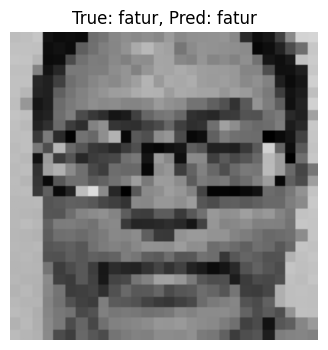

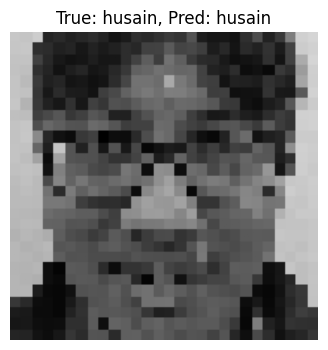

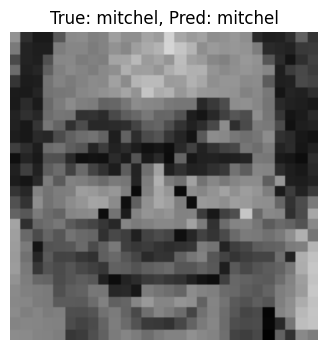

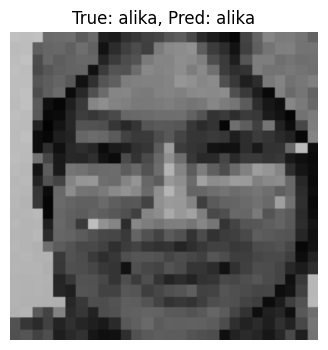

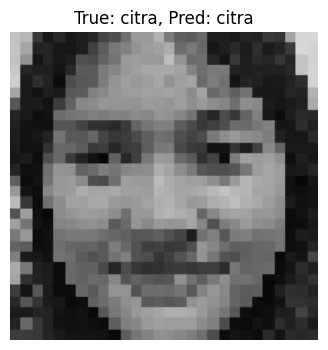

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


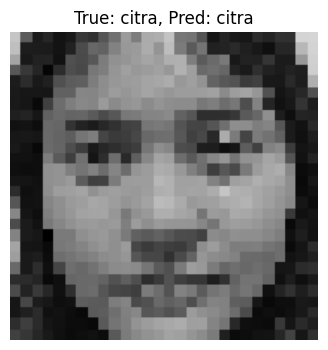

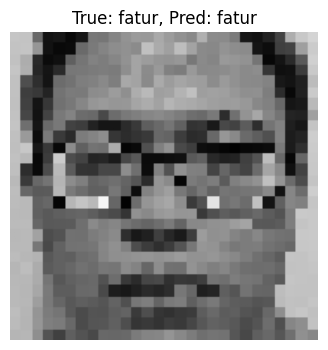

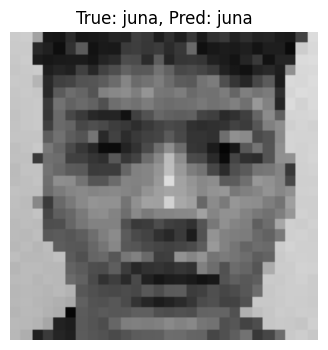

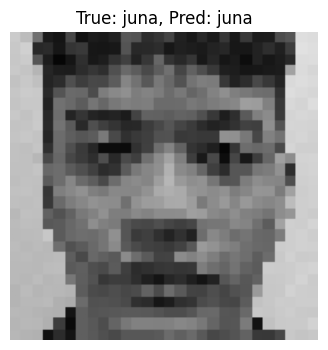

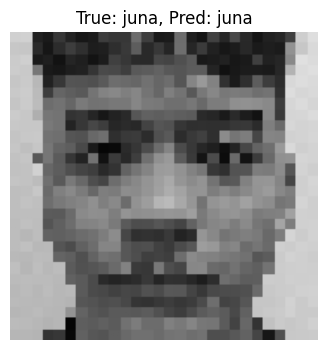

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize predictions
def visualize_predictions(model, data_gen, num_images=5):
    images, labels = next(data_gen)
    predictions = model.predict(images)
    class_labels = list(data_gen.class_indices.keys())
    
    for i in range(num_images):
        plt.figure(figsize=(4,4))
        plt.imshow(images[i])
        plt.title(f"True: {class_labels[np.argmax(labels[i])]}, Pred: {class_labels[np.argmax(predictions[i])]}") 
        plt.axis('off')
        plt.show()

visualize_predictions(model_smile, test_data_positives)
visualize_predictions(model_non_smile, test_data_negatives)


In [1]:
from tensorflow.keras.models import load_model

# Load the models
model_smile = load_model('model_smile.h5')
model_non_smile = load_model('model_non_smile.h5')

# Assuming labels are the names of people in the order of class indices
labels_smile = ['alika', 'athalah', 'citra', 'fatur', 'husain', 'juna', 'lily', 'mitchel', 'sayyid']  # For smile model
labels_non_smile = ['alika', 'athalah', 'citra', 'fatur', 'husain', 'juna', 'lily', 'mitchel', 'sayyid']  # For non-smile model


In [2]:
print("Smile Model Input Shape:", model_smile.input_shape)
print("Non-Smile Model Input Shape:", model_non_smile.input_shape)

Smile Model Input Shape: (None, 150, 150, 3)
Non-Smile Model Input Shape: (None, 150, 150, 3)


In [3]:
# import numpy as np
# import cv2
# import dlib
# from tensorflow.keras.models import load_model
# from math import atan2, degrees
# import time

# # Load pre-trained models for face and landmark detection
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# def preprocess_image(image, target_size):
#     # Resize the image
#     resized_image = cv2.resize(image, target_size)
    
#     # Normalize the image
#     normalized_image = resized_image.astype('float32') / 255.0
    
#     # Expand dimensions to match the expected input shape (1, 150, 150, 3)
#     expanded_image = np.expand_dims(normalized_image, axis=0)
    
#     return expanded_image

# # Load the models
# model_smile = load_model('model_smile.h5')
# model_non_smile = load_model('model_non_smile.h5')

# # Assuming labels are the names of people in the order of class indices
# labels_smile = ['alika', 'athalah', 'citra', 'fatur', 'husain', 'juna', 'lily', 'mitchel', 'sayyid']
# labels_non_smile = ['alika', 'athalah', 'citra', 'fatur', 'husain', 'juna', 'lily', 'mitchel', 'sayyid']

# def calculate_smile_angle(p1, p2):
#     delta_y = p2[1] - p1[1]
#     delta_x = p2[0] - p1[0]
#     angle = atan2(delta_y, delta_x)
#     return degrees(angle)

# cap = cv2.VideoCapture(0)

# # Target frame rate
# target_fps = 30
# frame_time = 1.0 / target_fps

# # Initialize prediction history for smoothing
# smile_prediction_history = []
# smoothing_window_size = 5

# while True:
#     start_time = time.time()
    
#     ret, frame = cap.read()
#     if not ret:
#         break

#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = detector(gray_frame)

#     for face in faces:
#         landmarks = predictor(gray_frame, face)

#         # Get coordinates of mouth corners and lips
#         left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
#         right_mouth = (landmarks.part(54).x, landmarks.part(54).y)
#         top_lip = (landmarks.part(51).x, landmarks.part(51).y)
#         bottom_lip = (landmarks.part(57).x, landmarks.part(57).y)

#         # Calculate smile angle
#         smile_angle = calculate_smile_angle(left_mouth, right_mouth)
#         print("Smile Angle:", smile_angle)  # Debugging info

#         # Extract face region
#         x, y, w, h = (face.left(), face.top(), face.width(), face.height())
#         face_region = frame[y:y+h, x:x+w]

#         # Preprocess face for smile detection
#         face_smile_input = preprocess_image(face_region, (150, 150))
#         try:
#             # Combine predictions from both models
#             smile_prediction = (model_smile.predict(face_smile_input) + model_non_smile.predict(face_smile_input)) / 2
#         except Exception as e:
#             print(f"Error in smile prediction: {e}")
#             continue  # Skip to the next face if there's an error

#         print("Combined Smile Prediction Probabilities:", smile_prediction) 
#         smile_class_index = np.argmax(smile_prediction)
#         person_name_smile = labels_smile[smile_class_index]

#         # Adjust threshold if needed
#         threshold = 0.7  
#         print(f"Prediction Value: {smile_prediction[0][smile_class_index]}")  
#         if smile_prediction[0][smile_class_index] > threshold:
#             smile_status = "Smiling"
#         else:
#             smile_status = "Not Smiling"

#         # Add prediction to history and smooth it
#         smile_prediction_history.append(smile_prediction[0][smile_class_index])
#         if len(smile_prediction_history) > smoothing_window_size:
#             smile_prediction_history.pop(0)
#         smoothed_prediction = np.mean(smile_prediction_history)

#         if smoothed_prediction > threshold:
#             smile_status = "Smiling"
#         else:
#             smile_status = "Not Smiling"

#         # Draw bounding box
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

#         # Display smile angle in the left corner of the screen
#         angle_label = f"Smile Angle: {smile_angle:.2f}"
#         cv2.putText(frame, angle_label, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

#         # Create label for name and smile status
#         label = f"{person_name_smile} - {smile_status}"

#         # Calculate the position for the text label below the bounding box
#         label_x = x
#         label_y = y + h + 30  

#         # Ensure the text label is within the image bounds
#         if label_y + 30 > frame.shape[0]:
#             label_y = frame.shape[0] - 30

#         # Draw the text label with full color
#         label_bg_color = (255, 255, 255)  # White background
#         label_text_color = (0, 0, 255)    # Red text
#         cv2.rectangle(frame, (label_x - 5, label_y - 30), (label_x + 200, label_y), label_bg_color, cv2.FILLED)
#         cv2.putText(frame, label, (label_x, label_y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.9, label_text_color, 2)

#     cv2.imshow("Smile Detection", frame)

#     # Calculate elapsed time and sleep
#     elapsed_time = time.time() - start_time
#     sleep_time = frame_time - elapsed_time
#     if sleep_time > 0:
#         time.sleep(sleep_time)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


Smile Angle: 5.710593137499642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Combined Smile Prediction Probabilities: [[4.7306767e-01 2.3295752e-05 2.2565549e-09 5.7615778e-12 5.2690452e-01
  2.7460358e-06 1.8108392e-14 4.3403006e-09 1.8340068e-06]]
Prediction Value: 0.5269045233726501
Smile Angle: 5.931526924919763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Combined Smile Prediction Probabilities: [[4.3892747e-01 1.7038845e-05 1.4948083e-09 1.0160302e-11 5.6104863e-01
  4.9026544e-06 1.8821834e-14 5.3184337e-09 1.9438207e-06]]
Prediction Value: 0.5610486268997192
Smile Angle: 6.753574035530993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Combined Smile Prediction Probabilities: [[4.3673524e-01 2.1568527e-05 1.8609762e-09 1.4355373e-11 5.6323200e-01
  8.3461937e-06 2.8070929e-14 5.7892877e-09 2.8480083e-06]]
Prediction Value: 0.5632320046424866
Smile Angle: 6.9343489012695585
1/1 ━━━━━━━━━━━━━

In [ ]:
import numpy as np
import cv2
import dlib
from tensorflow.keras.models import load_model
from math import atan2, degrees
import time

# Load pre-trained models for face and landmark detection
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def preprocess_image(image, target_size):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Load the models
model_smile = load_model('model_smile.h5')
model_non_smile = load_model('model_non_smile.h5')

# Assuming labels are the names of people in the order of class indices
labels_smile = ['alika', 'athalah', 'citra', 'fatur', 'husain', 'juna', 'lily', 'mitchel', 'sayyid']
labels_non_smile = ['alika', 'athalah', 'citra', 'fatur', 'husain', 'juna', 'lily', 'mitchel', 'sayyid']

def calculate_smile_angle(p1, p2):
    delta_y = p2[1] - p1[1]
    delta_x = p2[0] - p1[0]
    angle = atan2(delta_y, delta_x)
    return degrees(angle)

cap = cv2.VideoCapture(0)

# Target frame rate
target_fps = 30
frame_time = 1.0 / target_fps

while True:
    start_time = time.time()
    
    ret, frame = cap.read()
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray_frame)

    # Initialize smile_angle to handle cases where no face is detected
    smile_angle = None

    for face in faces:
        landmarks = predictor(gray_frame, face)

        # Get coordinates of mouth corners and lips
        left_mouth = (landmarks.part(48).x, landmarks.part(48).y)
        right_mouth = (landmarks.part(54).x, landmarks.part(54).y)
        top_lip = (landmarks.part(51).x, landmarks.part(51).y)
        bottom_lip = (landmarks.part(57).x, landmarks.part(57).y)

        # Calculate smile angle
        smile_angle = calculate_smile_angle(left_mouth, right_mouth)
        print("Smile Angle:", smile_angle)  # Debugging info

        # Extract face region
        x, y, w, h = (face.left(), face.top(), face.width(), face.height())
        face_region = frame[y:y+h, x:x+w]

        # Preprocess face for smile detection
        face_smile_input = preprocess_image(face_region, (150, 150))
        try:
            smile_prediction = model_smile.predict(face_smile_input)
        except Exception as e:
            print(f"Error in smile prediction: {e}")
            continue  # Skip to the next face if there's an error

        print("Smile Prediction Probabilities:", smile_prediction) 
        smile_class_index = np.argmax(smile_prediction)
        person_name_smile = labels_smile[smile_class_index]

        # Adjust threshold if needed
        threshold = 0.7  
        print(f"Prediction Value: {smile_prediction[0][smile_class_index]}")  
        if smile_prediction[0][smile_class_index] > threshold:
            smile_status = "Smiling"
        else:
            smile_status = "Not Smiling"

        # Draw bounding box
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # Display smile angle in the left corner of the screen
        if smile_angle is not None:
            angle_label = f"Smile Angle: {smile_angle:.2f}"
            cv2.putText(frame, angle_label, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Create label for name and smile status
        label = f"{person_name_smile} - {smile_status}"

        # Calculate the position for the text label below the bounding box
        label_x = x
        label_y = y + h + 30  

        # Ensure the text label is within the image bounds
        if label_y + 30 > frame.shape[0]:
            label_y = frame.shape[0] - 30

        # Draw the text label
        cv2.putText(frame, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imshow("Smile Detection", frame)

    # Calculate elapsed time and sleep
    elapsed_time = time.time() - start_time
    sleep_time = frame_time - elapsed_time
    if sleep_time > 0:
        time.sleep(sleep_time)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

: 